In [3]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns #for representation of relationship between variables.
from matplotlib import pyplot as plt
import scipy

In [4]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx', header=0, engine = 'openpyxl')
df.head() #checking first five entries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.tail() #checking last 5 entries

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [6]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

Cleaning data: 

1. Remove extra characters in columns and only numbers should exist in columns like account, customer_id.
2. Remove columns/rows with 40% missing data.
3. convert date format.
4. PLot using graphs.

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
df.info() #gives the info about the whole dataframe
#the non null count is showing how many values are filled. One way for a quick guess to know the null values is also subtract the total count which in this #case is 12043 by the number of count given here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [9]:
#parsing account column
df['account'] = df['account'].apply(lambda x: x.split('-')[1])
df['account']

0        1598451071
1        1598451071
2        1222300524
3        1037050564
4        1598451071
            ...    
12038    3021093232
12039    1608363396
12040    3827517394
12041    2920611728
12042    1443681913
Name: account, Length: 12043, dtype: object

In [10]:
#parsing customer_id column
df['customer_id'] = df['customer_id'].apply(lambda x: x.split('-')[1])
df['customer_id']
##try and see how this is working???? the splitting with index number

0        2487424745
1        2487424745
2        2142601169
3        1614226872
4        2487424745
            ...    
12038      55310383
12039    2688605418
12040    2663907001
12041    1388323263
12042    3129499595
Name: customer_id, Length: 12043, dtype: object

Analysing and Dropping for columns that have a higher percentage of missing values Or are not relevant to the insights that are asked by the client  

Removing columns with 40% null values as they will not not project good insights instead cause distortions and replacing the null values with mode value for 40% of missing data can provide misleading results.

In [11]:
df_majority = df.dropna(axis=1, thresh=int(0.4*len(df)))
df_majority.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

Further analysing the dataset and removing columns with repetitive/ irrelevant data

In [12]:
#dropping columns which do not assist in providing insights
df_cleaned = df_majority.drop(['status', 'currency', 'country', 'card_present_flag'], axis=1)
df_cleaned

,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit
1,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit
2,1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,2142601169,151.21 -33.87,debit
3,1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,1614226872,153.05 -26.68,debit
4,1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,3021093232,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,55310383,145.23 -37.81,debit
12039,1608363396,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,2688605418,150.88 -33.96,debit
12040,3827517394,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,2663907001,150.92 -33.74,debit
12041,2920611728,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,1388323263,145.09 -37.91,debit


In [13]:
df_cleaned.isnull().sum()

account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [14]:
df_cleaned.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [15]:
df_cleaned['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
6ddddc40-5b69-4253-8a26-167999a8bf96    10
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
                                        ..
22c763cf-e537-4c5d-9e05-82ba6c02db48     1
958785e9-7a35-4e6d-8e5d-51f1e12c1174     1
c3a9c01d-1171-4234-9fa8-1b3529504a56     1
f18e2613-241a-403c-82e4-5dcd4b454f9c     1
e50eccbe-413c-4568-8cc9-fad43171dfb4     1
Name: merchant_id, Length: 5725, dtype: int64

In [16]:
df_cleaned['merchant_id'].value_counts(dropna=False)

NaN                                     4326
106e1272-44ab-4dcb-a438-dd98e0071e51      14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f      12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f      11
6ddddc40-5b69-4253-8a26-167999a8bf96      10
                                        ... 
22c763cf-e537-4c5d-9e05-82ba6c02db48       1
958785e9-7a35-4e6d-8e5d-51f1e12c1174       1
c3a9c01d-1171-4234-9fa8-1b3529504a56       1
f18e2613-241a-403c-82e4-5dcd4b454f9c       1
4aa0c78c-a22c-4e9a-94aa-babed2d402d6       1
Name: merchant_id, Length: 5726, dtype: int64

In [17]:
df_cleaned['merchant_id'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

106e1272-44ab-4dcb-a438-dd98e0071e51    0.2%
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    0.2%
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    0.1%
6ddddc40-5b69-4253-8a26-167999a8bf96    0.1%
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    0.1%
                                        ... 
22c763cf-e537-4c5d-9e05-82ba6c02db48    0.0%
958785e9-7a35-4e6d-8e5d-51f1e12c1174    0.0%
c3a9c01d-1171-4234-9fa8-1b3529504a56    0.0%
f18e2613-241a-403c-82e4-5dcd4b454f9c    0.0%
e50eccbe-413c-4568-8cc9-fad43171dfb4    0.0%
Name: merchant_id, Length: 5725, dtype: object

In [18]:
df_cleaned['merchant_suburb'].value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Korumburra         1
Bracknell          1
Rutherglen         1
Waverley           1
Condingup          1
Name: merchant_suburb, Length: 1609, dtype: int64

In [19]:
df_cleaned['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Testing to find outliers using IQR

In [20]:
df_cleaned.columns

Index(['account', 'long_lat', 'txn_description', 'merchant_id', 'first_name',
       'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'amount', 'transaction_id', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

In [21]:
def modified_z_score(myData):
    median_my_data = np.median(myData)
    mad = np.median(myData.map(lambda x: np.abs(x - median_my_data)))
    modified_z_score = list(myData.map(lambda x: 0.6745*(x- median_my_data)/mad))
    return modified_z_score


In [22]:
modified_z_score(df_cleaned['age'])
mod_z_score_height = modified_z_score(df_cleaned['age'])
df_cleaned.iloc[np.where(np.abs(mod_z_score_height)>=3)]

,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
39,721712940,145.09 -37.82,POS,9ba904d4-5b0e-403c-b1bc-71e6a2bcdc0f,Andrew,49756.21,2018-08-01,M,78,Preston,VIC,2018-08-01T09:59:35.000+0000,25.70,431119a28af748cbb12920804a7fcda3,1646183815,145.03 -37.74,debit
98,2920611728,144.96 -37.76,PAY/SALARY,NaN,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,1388323263,NaN,credit
184,721712940,145.09 -37.82,POS,3a5629b1-d175-4133-b944-2c178bd78f69,Andrew,49743.84,2018-08-02,M,78,East Melbourne,VIC,2018-08-02T10:12:40.000+0000,12.37,4a820c04e7ae4136a8e2779a2a41eff6,1646183815,144.97 -37.81,debit
185,559365433,147.31 -42.88,SALES-POS,092cf080-71f6-45f7-a423-23fb0fdc91d7,Mary,159.66,2018-08-02,F,64,Mount Beauty,VIC,2018-08-02T10:29:20.000+0000,31.50,40e386bdc36a45e984537e154039f5af,1654129794,147.17 -36.74,debit
199,721712940,145.09 -37.82,PAY/SALARY,NaN,Andrew,50526.26,2018-08-02,M,78,NaN,NaN,2018-08-02T12:00:00.000+0000,782.42,087234ecb6994edbb66d56965387b885,1646183815,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,559365433,147.31 -42.88,SALES-POS,28306da3-da51-41c7-9a73-91ec2255a4b7,Mary,4524.49,2018-10-29,F,64,Melbourne,VIC,2018-10-29T10:26:39.000+0000,7.24,6584cb1aced5491aa5933c42d2cd4533,1654129794,144.96 -37.82,debit
11791,2920611728,144.96 -37.76,PAYMENT,NaN,Tyler,10394.38,2018-10-29,M,69,NaN,NaN,2018-10-29T20:00:00.000+0000,64.00,ab22022bdc484b48814d1e2ec360f484,1388323263,NaN,debit
11813,2920611728,144.96 -37.76,SALES-POS,fb65ded2-f680-474b-a46b-86cb75bc2125,Tyler,10338.32,2018-10-30,M,69,Doncaster,VIC,2018-10-30T01:11:14.000+0000,56.06,5eb8e60b883542a8b584e10e33b64cc0,1388323263,145.12 -37.78,debit
12001,2920611728,144.96 -37.76,PAY/SALARY,NaN,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,1388323263,NaN,credit


In [23]:
def get_lower_upper_bound(my_data):
    #Getting first and third quartile
    q1 = np.percentile(my_data, 25)
    q3 = np.percentile(my_data, 75)

    #Calculating IQR
    iqr = q3 - q1

    #computer lower and upper bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return lower_bound, upper_bound

In [24]:
def get_outliers_iqr(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    return my_data[np.where(np.logical_or((my_data > upper_bound), (my_data < lower_bound)))]

In [25]:
get_outliers_iqr(df_cleaned['age'].values)

array([78, 69, 78, 64, 78, 69, 64, 78, 78, 69, 64, 69, 69, 69, 78, 64, 64,
       64, 69, 69, 78, 69, 69, 69, 64, 64, 69, 69, 69, 69, 69, 64, 69, 64,
       64, 69, 78, 69, 69, 64, 64, 64, 64, 78, 64, 78, 69, 69, 64, 64, 69,
       64, 69, 64, 78, 64, 64, 78, 69, 64, 69, 69, 69, 69, 78, 69, 69, 64,
       64, 78, 69, 69, 64, 69, 64, 69, 69, 69, 64, 69, 69, 69, 69, 64, 69,
       69, 78, 64, 64, 64, 69, 78, 69, 64, 64, 69, 64, 64, 64, 69, 69, 69,
       69, 69, 69, 69, 64, 78, 64, 64, 64, 78, 69, 64, 69, 78, 69, 78, 78,
       64, 78, 69, 69, 64, 69, 69, 69, 69, 69, 69, 69, 69, 78, 69, 69, 64,
       69, 78, 69, 69, 69, 64, 69, 64, 64, 69, 64, 64, 64, 78, 64, 78, 69,
       69, 69, 64, 64, 64, 69, 69, 64, 64, 78, 64, 64, 64, 64, 64, 64, 64,
       78, 64, 69, 64, 64, 64, 69, 69, 69, 64, 69, 64, 69, 69, 64, 64, 78,
       69, 64, 78, 64, 64, 69, 78, 78, 69, 64, 69, 64, 69, 69, 64, 69, 64,
       69, 64, 69, 69, 78, 64, 64, 78, 64, 64, 64, 69, 64, 64, 69, 64, 69,
       69, 69, 69])

<AxesSubplot:>

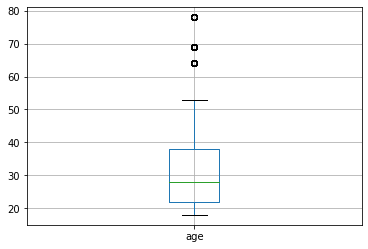

In [117]:
df_cleaned.boxplot(column=['age'])

In [131]:
df_cleaned['age'].describe() #So after researching and analysing the data, the outliers in the age column should be left as is since the min value is 18 and max value is 78 which seems alright and they do look like true outliers.

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

<AxesSubplot:>

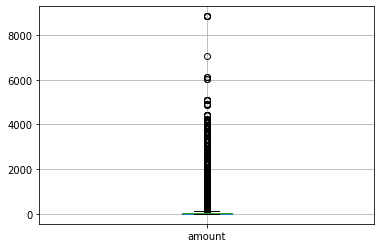

In [133]:
df_cleaned.boxplot(column=['amount']) #not deleting outliers as they seem like true outliers since there can be a transaction of 8k-10k.

Gathering insights. 

average transactions each month

In [28]:
Amount_df = df_cleaned['amount']
Amount_df.mean()

187.93358797641784

Average number of transactions per month

In [35]:
#how many transactions do customers make each month on average??
#take out average transactions each month.
#find the average of all the three months.

#Transactions in the month of August
df_cleaned['extraction'] = pd.to_datetime(df_cleaned.extraction) #converting time format in the dataframe to pandas datatime format. Changing only the extraction column

extractionByMonth = df_cleaned.extraction.dt.month #extracting the month data only
extractionByMonth.head()

0    8
1    8
2    8
3    8
4    8
Name: extraction, dtype: int64

ValueError: Grouper for '8' not 1-dimensional

In [ ]:
augustValues = []
septValues = []
octValues = []

for month in extractionByMonth: 
    """Seperating months of August for further processing"""
    if month == 8:
        augustValues.append(True)
    else:
        augustValues.append(False)
    
for month in extractionByMonth:
    """Seperating months of August for further processing"""
    if month == 9:
        septValues.append(True)
    else:
        septValues.append(False)
    
for month in extractionByMonth:
    """Seperating months of August for further processing"""
    if month == 10:
        octValues.append(True)
    else:
        octValues.append(False)

augustData = transactions.loc[augustValues] #displays the dataframe with all the other column values that fall in the month of august
septData = transactions.loc[septValues] #displays the dataframe with all the other column values that fall in the month of september
octData = transactions.loc[octValues] #displays the dataframe with all the other column values that fall in the month of october


repeatCust_idAug = pd.DataFrame(augustData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalAug = repeatCust_idAug.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

repeatCust_idSept = pd.DataFrame(septData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalSept = repeatCust_idSept.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

repeatCust_idOct = pd.DataFrame(octData, columns=['customer_id']) #finding the repeating items in the column and adding the number of times each customer id is repeated 
repCustTotalOct = repeatCust_idOct.pivot_table(index=['customer_id'], aggfunc='size') #number of times each customer_id has been repeated

averageTranPerMonth = [repCustTotalAug.mean(), repCustTotalSept.mean(), repCustTotalOct.mean()] 
averageTranPerMonthSeries = pd.Series(averageTranPerMonth)

sns.factorplot(extractionByMonth, data=dropData, kind='count')
#print(int(averageTranPerMonthSeries.mean()))



Segmenting the data

We will take the whole column(extraction) and then extarct the first week of August and then display the transaction volume in the week. This will include credit and debit 


In [ ]:
#testWeek = transactions.extraction.dt.dayofweek
#testWeek.head()
#augustData

In [ ]:
df_extraction = pd.to_datetime( dropData['extraction']) #converted all dates
#df_extraction

In [ ]:
extractionByWeek = df_extraction.dt.isocalendar().week #filtering by week of the year
extractionByWeekOne = extractionByWeek[extractionByWeek == 31]  

In [ ]:
#extractionByWeekOne
#extractionByWeekOne

In [ ]:
import datetime
datetime.date(2018, 8, 1).isocalendar()[1]